 Name: Baliram Sah
 USN: 1CD24AI018
 Banch: AIML(3A)
 College: Cambridge Institute of Technology K.R Puram
 E-mail: sahrama9033@gmail.com or
         baliram.24aiml@cambridge.edu.in








# Vehicle Fuel Efficiency Analysis using Machine Learning

This project aims to analyze various vehicle parameters and study their relationship with fuel efficiency using data analysis and machine learning techniques.

## Problem Statement

Fuel efficiency is an important factor in vehicle performance and cost-effectiveness.  
The objective of this project is to analyze how different vehicle features such as engine displacement, weight, aerodynamics, and transmission type affect fuel efficiency.

**import libraries**

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

**Load Dataset**

In [6]:
data = pd.read_csv("vehicle_fuel_efficiency.csv")
data.head()

,engine_displacement_cc,vehicle_weight_kg,drag_coefficient,transmission_type,fuel_type,cylinders,turbocharged,drivetrain,tire_type,aerodynamics_package,fuel_efficiency_mpg
0,2498.160475,1299.858908,0.302341,Automatic,Diesel,4.0,No,AWD,NaN,Sport,18.180450
1,4802.857226,2263.132558,0.299396,CVT,Hybrid,4.0,Yes,FWD,Eco,NaN,26.053944
2,3927.975767,3156.953757,0.431251,Manual,Diesel,6.0,No,AWD,Performance,Sport,40.621988
3,3394.633937,2777.007193,0.299909,NaN,Petrol,4.0,NaN,AWD,All-Season,Eco,42.295128
4,1624.074562,2977.715099,0.304390,Automatic,Petrol,6.0,Yes,FWD,All-Season,Standard,16.713056


## Initial Data Exploration

In this step, we examine the structure, size, and data types of the dataset.

In [7]:
data.shape

(1000, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   engine_displacement_cc  950 non-null    float64
 1   vehicle_weight_kg       952 non-null    float64
 2   drag_coefficient        946 non-null    float64
 3   transmission_type       948 non-null    object 
 4   fuel_type               947 non-null    object 
 5   cylinders               953 non-null    float64
 6   turbocharged            937 non-null    object 
 7   drivetrain              955 non-null    object 
 8   tire_type               940 non-null    object 
 9   aerodynamics_package    954 non-null    object 
 10  fuel_efficiency_mpg     956 non-null    float64
dtypes: float64(5), object(6)
memory usage: 86.1+ KB


## Data Cleaning

Data cleaning involves handling missing values and preparing the dataset for analysis and modeling.

In [9]:
data.isnull().sum()

,0
engine_displacement_cc,50
vehicle_weight_kg,48
drag_coefficient,54
transmission_type,52
fuel_type,53
cylinders,47
turbocharged,63
drivetrain,45
tire_type,60
aerodynamics_package,46


**Numerical and categoriyal columns seperate**

In [10]:
num_cols = data.select_dtypes(include=['int64','float64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

num_cols, cat_cols

(Index(['engine_displacement_cc', 'vehicle_weight_kg', 'drag_coefficient',
        'cylinders', 'fuel_efficiency_mpg'],
       dtype='object'),
 Index(['transmission_type', 'fuel_type', 'turbocharged', 'drivetrain',
        'tire_type', 'aerodynamics_package'],
       dtype='object'))

**numerical columns- missing values fill**

In [11]:
for col in num_cols:
    data[col].fillna(data[col].mean(), inplace=True)

/tmp/ipython-input-1735585256.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mean(), inplace=True)


**categorial columns- missing values fill**

In [12]:
for col in cat_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

/tmp/ipython-input-1194294401.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


**verify - missing values gone or not**

In [13]:
data.isnull().sum()

,0
engine_displacement_cc,0
vehicle_weight_kg,0
drag_coefficient,0
transmission_type,0
fuel_type,0
cylinders,0
turbocharged,0
drivetrain,0
tire_type,0
aerodynamics_package,0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   engine_displacement_cc  1000 non-null   float64
 1   vehicle_weight_kg       1000 non-null   float64
 2   drag_coefficient        1000 non-null   float64
 3   transmission_type       1000 non-null   object 
 4   fuel_type               1000 non-null   object 
 5   cylinders               1000 non-null   float64
 6   turbocharged            1000 non-null   object 
 7   drivetrain              1000 non-null   object 
 8   tire_type               1000 non-null   object 
 9   aerodynamics_package    1000 non-null   object 
 10  fuel_efficiency_mpg     1000 non-null   float64
dtypes: float64(5), object(6)
memory usage: 86.1+ KB


## Data Distribution Analysis

This section visualizes the distribution of numerical features to understand their spread and patterns.

Histogram-Engine Displacement


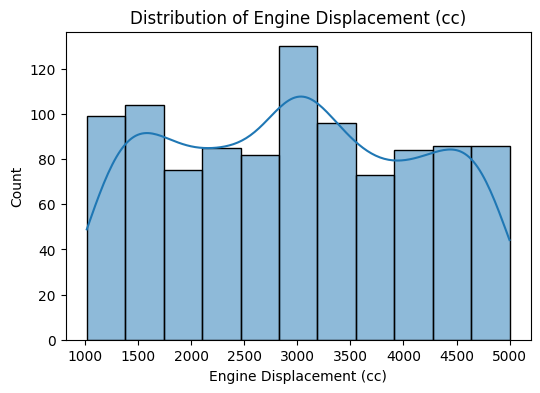

In [15]:
plt.figure(figsize=(6,4))
sns.histplot(data['engine_displacement_cc'], kde=True)
plt.title("Distribution of Engine Displacement (cc)")
plt.xlabel("Engine Displacement (cc)")
plt.ylabel("Count")
plt.show()

Histogram-Vehicle Weight

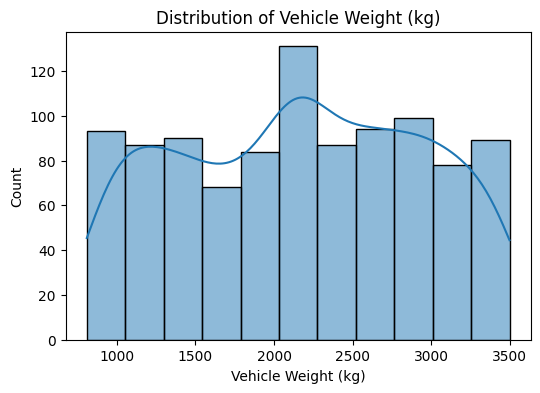

In [16]:
plt.figure(figsize=(6,4))
sns.histplot(data['vehicle_weight_kg'], kde=True)
plt.title("Distribution of Vehicle Weight (kg)")
plt.xlabel("Vehicle Weight (kg)")
plt.ylabel("Count")
plt.show()

Histogram- Fuel Efficiency

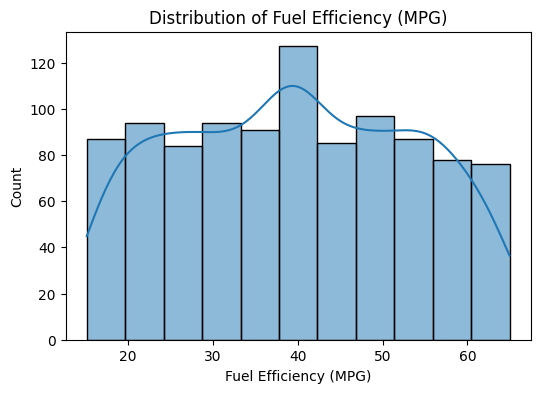

In [17]:
plt.figure(figsize=(6,4))
sns.histplot(data['fuel_efficiency_mpg'], kde=True)
plt.title("Distribution of Fuel Efficiency (MPG)")
plt.xlabel("Fuel Efficiency (MPG)")
plt.ylabel("Count")
plt.show()

## scatter plot- Weight vs Fuel efficiency

 **Relationship between Vehicle Weight and Fuel Efficiency**

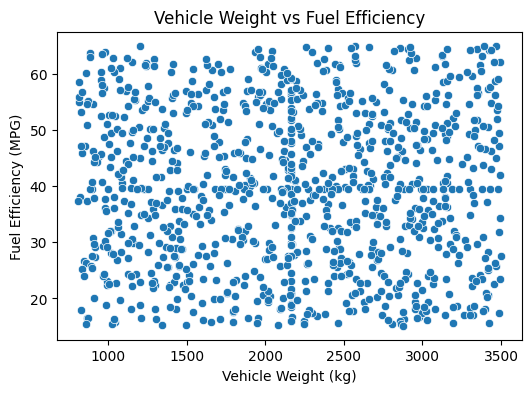

In [18]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='vehicle_weight_kg',
    y='fuel_efficiency_mpg',
    data=data
)
plt.title("Vehicle Weight vs Fuel Efficiency")
plt.xlabel("Vehicle Weight (kg)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.show()

##Scatter plot- Engine CC vs fuel efficiency

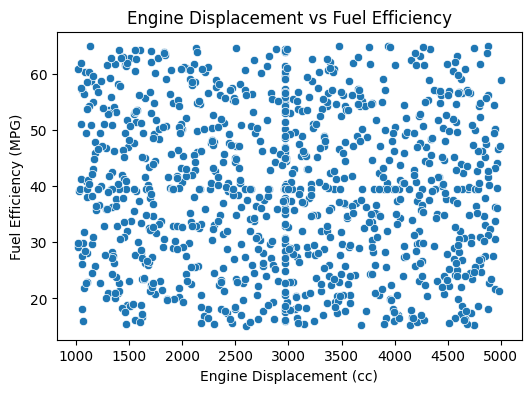

In [19]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x='engine_displacement_cc',
    y='fuel_efficiency_mpg',
    data=data
)
plt.title("Engine Displacement vs Fuel Efficiency")
plt.xlabel("Engine Displacement (cc)")
plt.ylabel("Fuel Efficiency (MPG)")
plt.show()

##Correlation HeatMap

## Correlation Analysis

Correlation analysis helps in understanding the relationship between different features and fuel efficiency.

In [20]:
data.select_dtypes(include='object').columns

Index(['transmission_type', 'fuel_type', 'turbocharged', 'drivetrain',
       'tire_type', 'aerodynamics_package'],
      dtype='object')

**categoriyal -> numerical**

In [21]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in data.select_dtypes(include='object').columns:
    data[col] = le.fit_transform(data[col])

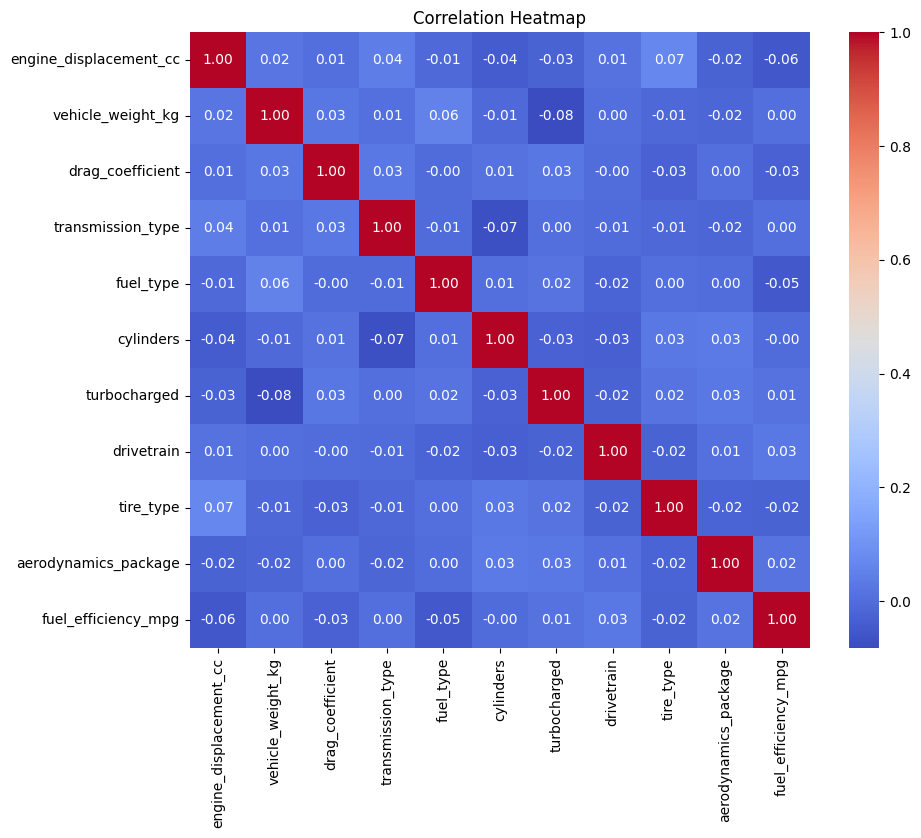

In [22]:
corr_matrix = data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

**target variable identify**

In [23]:
data['fuel_efficiency_mpg']

,fuel_efficiency_mpg
0,18.180450
1,26.053944
2,40.621988
3,42.295128
4,16.713056
...,...
995,20.902725
996,17.813749
997,35.599699
998,43.945827


###Check correlation with target

In [24]:
corr_with_target = corr_matrix['fuel_efficiency_mpg'].sort_values(ascending=False)
corr_with_target

,fuel_efficiency_mpg
fuel_efficiency_mpg,1.000000
drivetrain,0.031116
aerodynamics_package,0.015829
turbocharged,0.010432
vehicle_weight_kg,0.003746
transmission_type,0.002401
cylinders,-0.003929
tire_type,-0.024195
drag_coefficient,-0.029343
fuel_type,-0.052047


Core_with_target

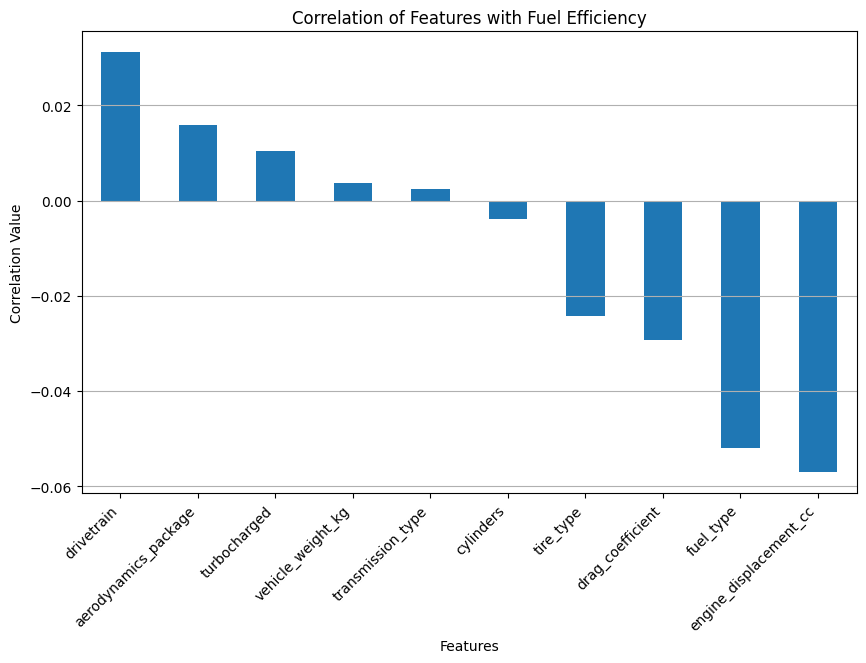

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

corr_with_target.drop('fuel_efficiency_mpg').plot(
    kind='bar',
)

plt.title("Correlation of Features with Fuel Efficiency")
plt.xlabel("Features")
plt.ylabel("Correlation Value")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')

plt.show()

##Define x and y

In [ ]:
X = data.drop('fuel_efficiency_mpg', axis=1)
y = data['fuel_efficiency_mpg']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

LinearRegression()

##PREDICTION

In [ ]:
y_pred_lr = lr.predict(X_test_scaled)

##MODEL EVALUATION

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score (Linear Regression):", r2_score(y_test, y_pred_lr))
print("MSE (Linear Regression):", mean_squared_error(y_test, y_pred_lr))

R2 Score (Linear Regression): -0.010996168754184632
MSE (Linear Regression): 192.53020489154906


SAMPLE PREDICTION

In [ ]:
lr.predict(X_test_scaled[:1])

array([42.75062749])

#RANDOM FOREST REGRESSOR

**Import Ranmdom forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model train

In [ ]:
rf = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

**Prediction**

In [ ]:
y_pred_rf = rf.predict(X_test)

**Model Evaluation**

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print("R2 Score (Random Forest):", r2_score(y_test, y_pred_rf))
print("MSE (Random Forest):", mean_squared_error(y_test, y_pred_rf))

R2 Score (Random Forest): -0.10013272219457359
MSE (Random Forest): 209.50502579354324


Sample Prediction

In [ ]:
rf.predict(X_test[:1])

array([42.48286023])

##Model Comparison

In [ ]:
print("Linear Regression R2:", r2_score(y_test, y_pred_lr))
print("Random Forest R2:", r2_score(y_test, y_pred_rf))

Linear Regression R2: -0.010996168754184632
Random Forest R2: -0.10013272219457359


**Feature Importance(graph)**

In [ ]:
import pandas as pd

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf.feature_importances_
})

feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
feature_importance

,Feature,Importance
2,drag_coefficient,0.233803
1,vehicle_weight_kg,0.220478
0,engine_displacement_cc,0.214431
5,cylinders,0.059755
7,drivetrain,0.055857
3,transmission_type,0.054357
8,tire_type,0.053695
9,aerodynamics_package,0.043475
4,fuel_type,0.039914
6,turbocharged,0.024236


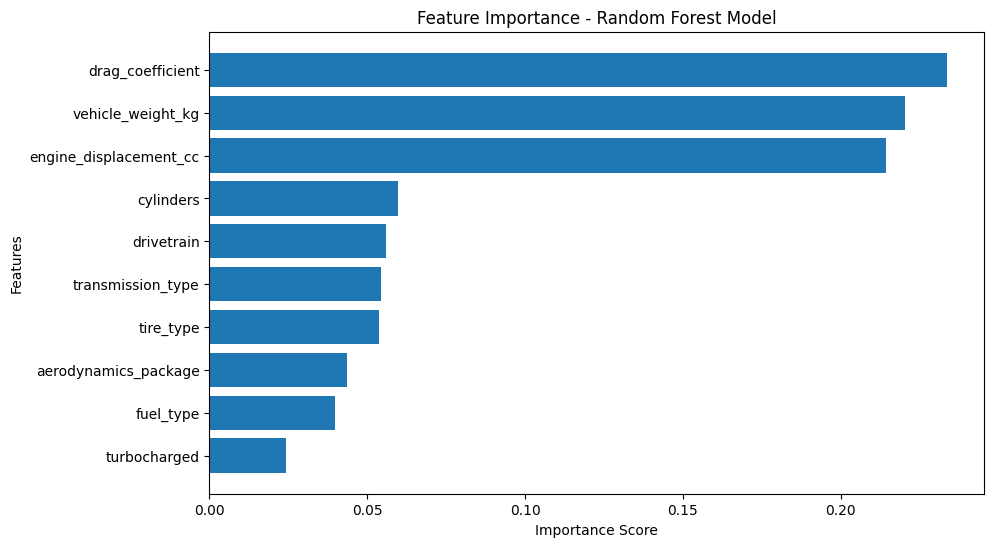

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'])
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance - Random Forest Model")
plt.gca().invert_yaxis()
plt.show()